In [120]:
import numpy as np
import pandas as pd
import graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score
DATA=pd.read_csv('Data_for_UCI_named.csv', delimiter = ',')
DATA

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,-0.017385,stable
6,6.710166,3.765204,6.929314,8.818562,2.397419,-0.614590,-1.208826,-0.574004,0.177890,0.397977,0.402046,0.376630,0.005954,unstable
7,6.953512,1.379125,5.719400,7.870307,3.224495,-0.748998,-1.186517,-1.288980,0.371385,0.633204,0.732741,0.380544,0.016634,unstable
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,-0.038677,stable
9,9.841496,1.413822,9.769856,7.641616,4.727595,-1.991363,-0.857637,-1.878594,0.376356,0.544415,0.792039,0.116263,0.012383,unstable


In [121]:
print(DATA.shape)
DATA[0:]
DATA.columns

(10000, 14)


Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

In [122]:
input=np.zeros((10000,13))

## input and output

In [123]:
input[0:,0]=DATA['tau1']
input[:,1]=DATA['tau2']
input[:,2]=DATA['tau3']
input[:,3]=DATA['tau4']
input[:,4]=DATA['p1']
input[:,5]=DATA['p2']
input[:,6]=DATA['p3']
input[:,7]=DATA['p4']
input[:,8]=DATA['g1']
input[:,9]=DATA['g2']
input[:,10]=DATA['g3']
input[:,11]=DATA['g4']
input[:,12]=DATA['stab']

In [124]:
output=np.zeros((10000,0))

In [125]:
output=DATA['stabf']

In [126]:
train=input[0:7000]

In [127]:
test=input[7000:10000]

Training the Decision tree...
1.0


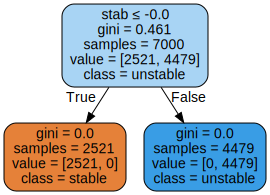

In [133]:
classNames=np.array(['stable','unstable'])
featureNames=np.array(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2','g3', 'g4', 'stab'])
print( "Training the Decision tree...")
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train, output[0:7000])
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("train") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=featureNames,  
                         class_names=classNames,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
print(clf.score(test, output[7000:10000]))
graph

In [131]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(train,output[0:7000])                         
clf.score(test, output[7000:10000])

0.7536666666666667

In [132]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(train, output[0:7000])

clf.score(test, output[7000:10000])

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.904